#### PART 1

##### Summary Statistics

In [175]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

##### Importing Datasets

In [176]:
#import call transaction dataset
transaction_data = pd.read_csv("cdr.csv")
display(transaction_data.head(40))

,caller_id,recipient_id,date,time,duration,tower_id,prefecture,hour
0,6RUMEMGE,23RJAXQ1,2020-01-01,00:24:29,99,tower23,BLITTA,0
1,RH9604A1,VF8PQW02,2020-01-01,00:25:24,152,tower84,TCHAOUDJO,0
2,UHX8BQMK,SB2GZAJU,2020-01-01,00:59:41,100,tower62,LOME COMMUNE,0
3,E35NJHCH,C18O8PW7,2020-01-01,01:26:30,89,tower32,EST-MONO,1
4,536AAL2Y,LFXCTNCS,2020-01-01,01:36:15,113,tower37,GOLFE,1
5,41PJSO2K,YDGVL625,2020-01-01,01:50:34,128,tower55,LOME COMMUNE,1
6,SG8WV7D2,BVAS9K9W,2020-01-01,01:51:45,62,tower14,AKEBOU,1
7,DVO6WS7K,BVAS9K9W,2020-01-01,02:09:39,108,tower48,KOZAH,2
8,FRS832YF,1S9T7ERF,2020-01-01,02:16:42,54,tower42,GOLFE,2
9,7G2T9TPC,OO66L484,2020-01-01,02:20:01,110,tower18,ASSOLI,2


In [177]:
#import tower dataset
tower_data = pd.read_csv("towers.csv")
display(tower_data)

,tower_id,longitude,latitude
0,tower26,0.497253,9.860677
1,tower60,1.296134,6.162604
2,tower2,1.180004,6.272656
3,tower51,1.614710,6.353378
4,tower71,1.305223,7.585271
...,...,...,...
98,tower99,0.436116,10.922298
99,tower67,1.551156,7.284856
100,tower64,1.196773,6.182105
101,tower47,1.179417,9.640990


In [178]:
#import shapefile dataset
shapefile_data = gpd.read_file("prefectures.geojson")
display(shapefile_data)

,prefecture,geometry
0,AGOE-NYIVE,"MULTIPOLYGON (((1.20311 6.20259, 1.20312 6.202..."
1,AGOU,"MULTIPOLYGON (((0.76232 6.98173, 0.76235 6.981..."
2,AKEBOU,"MULTIPOLYGON (((1.03847 7.9606, 1.0399 7.95243..."
3,ANIE,"MULTIPOLYGON (((1.63272 7.9173, 1.63404 7.9031..."
4,ASSOLI,"MULTIPOLYGON (((1.39821 9.45398, 1.39826 9.453..."
5,AVE,"MULTIPOLYGON (((1.04632 6.32653, 1.05095 6.296..."
6,BAS-MONO,"MULTIPOLYGON (((1.6757 6.57961, 1.67418 6.5730..."
7,BASSAR,"MULTIPOLYGON (((0.91691 9.6455, 0.91328 9.6335..."
8,BINAH,"MULTIPOLYGON (((1.36065 9.48701, 1.36094 9.486..."
9,BLITTA,"MULTIPOLYGON (((1.23537 8.35972, 1.23306 8.357..."


##### Question 1.1: How many transactions are there?

In [179]:
num_transactions = len(transaction_data)
print(f'There are {num_transactions} transactions in the transaction dataset.')

There are 13513 transactions in the transaction dataset.


##### Question 1.2: How many unique callers are there (how many subscribers place at least one call on the network)?

In [180]:
unique_subscribers = transaction_data['caller_id'].nunique()
print(f'There are {unique_subscribers} unique subscribers in the transaction dataset.')

There are 145 unique subscribers in the transaction dataset.


##### Question 1.3: How many unique receivers are there (how many subscribers receive at least one call on the network)?

In [181]:
unique_receivers = transaction_data["recipient_id"].nunique()
print(f'There are {unique_receivers} unique receivers in the transaction dataset.')

There are 146 unique receivers in the transaction dataset.


##### Question 1.4: How many days does the data cover?

In [182]:
total_days = transaction_data['date'].nunique()
print(f'There are {total_days} total days in the transaction dataset.')

There are 91 total days in the transaction dataset.


##### Question 1.5: How many calls does the average subscriber place per day? How many calls does the average subscriber receive per day?

In [183]:
# Calculate the total number of calls
total_calls = len(transaction_data)

# Count the number of unique subscribers who placed calls
unique_callers = transaction_data["caller_id"].nunique()

# Count the number of unique subscribers who received calls
unique_recipients = transaction_data["recipient_id"].nunique()

# Count the number of unique days in the dataset
unique_days = transaction_data["date"].nunique()

# Calculate the average calls placed per subscriber per day
average_calls_placed_per_subscriber_per_day = total_calls / (unique_callers * unique_days)

# Calculate the average calls received per subscriber per day
average_calls_received_per_subscriber_per_day = total_calls / (unique_recipients * unique_days)
print(f'The overall average number of calls placed per subscriber per day is {average_calls_placed_per_subscriber_per_day:.3f}.')
print(f'The overall average number of calls received per subscriber per day is {average_calls_received_per_subscriber_per_day:.3f}.')

The overall average number of calls placed per subscriber per day is 1.024.
The overall average number of calls received per subscriber per day is 1.017.


##### PART 2

##### Map The Towers

##### Question 2.1: Create a map of the prefectures of Togo, and overlay the locations of each cell tower

<Axes: >

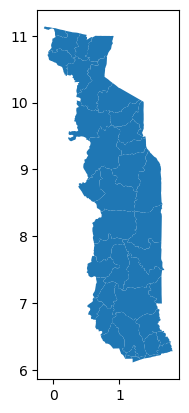

In [184]:
#to see the whole map
shapefile_data.plot()

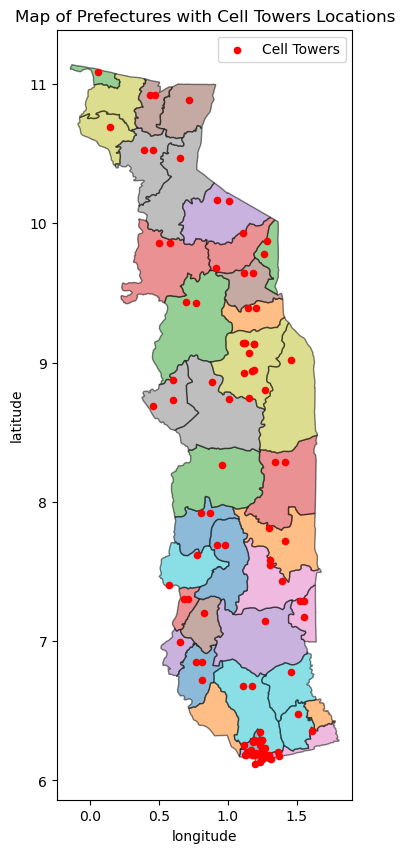

In [185]:
# Plot the map with cell towers overlay
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the shapefile data
shapefile_data.plot(column='prefecture', ax=ax, legend=True, alpha=0.5, edgecolor='black')

# Overlay the cell tower data
tower_data.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='Cell Towers')

# Add title and legend
plt.title('Map of Prefectures with Cell Towers Locations')
plt.legend()
plt.show()

#### PART 3

##### Inferring Home Perfectures

##### Question 3.2: Choose one of your approaches from question 3.1, and implement it using the dataset provided. Produce a table with subscribers matched to the prefecture you estimate they live in, and include this table in your write-up

##### Modal nighttime location

In [186]:
# Filter for nighttime calls (8 PM - 6 AM)
nighttime_calls = transaction_data[(transaction_data['hour'] >= 20) | (transaction_data['hour'] <= 6)]

# Identify the universe of subscribers
all_callers = set(transaction_data['caller_id'])
all_recipients = set(transaction_data['recipient_id'])
all_subscribers = all_callers.union(all_recipients)

# Identify nighttime callers and recipients
nighttime_callers = set(nighttime_calls['caller_id'])
nighttime_recipients = set(nighttime_calls['recipient_id'])
receivers_only = nighttime_recipients - nighttime_callers

# Map tower to caller
caller_data = nighttime_calls[['caller_id', 'tower_id']].rename(columns={'caller_id': 'subscriber_id'})
call_counts = caller_data.groupby(['subscriber_id', 'tower_id']).size().reset_index(name='count')
modal_tower = call_counts.loc[call_counts.groupby('subscriber_id')['count'].idxmax()]

# Map towers to prefectures
tower_mapping = transaction_data[['tower_id', 'prefecture']].drop_duplicates()
modal_tower = modal_tower.merge(tower_mapping, on='tower_id', how='left')

# Create a DataFrame for receivers-only
receivers_only_df = pd.DataFrame({'subscriber_id': list(receivers_only)})
receivers_only_df['prefecture'] = None  
receivers_only_df['tower_id'] = None
receivers_only_df['count'] = 0 

# Combine datasets
nighttime_mapping = pd.concat([modal_tower, receivers_only_df], ignore_index=True)
nighttime_mapping = nighttime_mapping[['subscriber_id', 'prefecture', 'tower_id', 'count']]
display(nighttime_mapping.head(30))
display(nighttime_mapping.count())

,subscriber_id,prefecture,tower_id,count
0,06BA9LHR,OTI-SUD,tower97,11
1,0706DUPJ,LOME COMMUNE,tower53,7
2,0HHVC11B,TCHAOUDJO,tower82,5
3,1DJTB0AG,GOLFE,tower36,4
4,1S9T7ERF,KOZAH,tower47,6
5,23RJAXQ1,DANKPEN,tower26,5
6,2B4LACSW,GOLFE,tower33,2
7,3D70JPBF,GOLFE,tower34,5
8,3H7ROWGG,HAHO,tower43,21
9,3VZAX0RR,LOME COMMUNE,tower61,5


subscriber_id    149
prefecture       140
tower_id         140
count            149
dtype: int64

In [187]:
# Filter nighttime_mapping for receivers-only
receivers_only_list = list(receivers_only)
nighttime_receivers_only = nighttime_mapping[nighttime_mapping['subscriber_id'].isin(receivers_only_list)]

# Display the list of subscribers who only received calls at night
print("List of subscribers who ONLY received calls at night:")
display(nighttime_receivers_only)
num_receivers_only = nighttime_receivers_only.shape[0]
print(f"Total number of subscribers who only received calls at night: {num_receivers_only}")


List of subscribers who ONLY received calls at night:


,subscriber_id,prefecture,tower_id,count
140,Y2SSO9KF,None,None,0
141,SQUN4FQ1,None,None,0
142,D8F040KM,None,None,0
143,VF8PQW02,None,None,0
144,UUQXQRFE,None,None,0
145,GQZH5IFP,None,None,0
146,C18O8PW7,None,None,0
147,DGYF840Q,None,None,0
148,2LI3ERUW,None,None,0


Total number of subscribers who only received calls at night: 9


##### Question 3.6: Pick a second approach from the three approaches you brainstormed in question 3.1, and implement it. Produce a table with subscribers matched to the prefecture you estimate they live in, and include this table in your write-up.

##### Mode of modes

In [188]:
# Create tower to prefecture mapping
tower_to_prefecture_mapping = transaction_data[['tower_id', 'prefecture']].drop_duplicates()

# Find the modal cell tower for each caller during the day (7 AM - 7 PM)
daytime_calls = transaction_data[(transaction_data['time'] >= "07:00:00") & (transaction_data['time'] <= "19:00:00")]
daytime_call_counts = daytime_calls.groupby(['caller_id', 'tower_id']).size().reset_index(name='count')
caller_to_day_modal_tower = daytime_call_counts.loc[daytime_call_counts.groupby('caller_id')['count'].idxmax()]

# Find the modal cell tower for each caller during the night (7 PM - 7 AM)
nighttime_calls = transaction_data[(transaction_data['time'] >= "19:00:00") | (transaction_data['time'] <= "07:00:00")]
nighttime_call_counts = nighttime_calls.groupby(['caller_id', 'tower_id']).size().reset_index(name='count')
caller_to_night_modal_tower = nighttime_call_counts.loc[nighttime_call_counts.groupby('caller_id')['count'].idxmax()]

# Map modal towers to prefectures
caller_to_day_prefecture = caller_to_day_modal_tower.merge(tower_to_prefecture_mapping, on='tower_id')[['caller_id', 'prefecture']]
caller_to_night_prefecture = caller_to_night_modal_tower.merge(tower_to_prefecture_mapping, on='tower_id')[['caller_id', 'prefecture']]

# Combine day and night prefectures for each caller
caller_to_prefectures = caller_to_day_prefecture.merge(caller_to_night_prefecture, on='caller_id', suffixes=('_day', '_night'))

# Find the mode of modes for each caller
caller_to_mode_prefecture = caller_to_prefectures.apply(lambda row: row[['prefecture_day', 'prefecture_night']].mode().iloc[0], axis=1)
caller_to_mode_prefecture = caller_to_prefectures[['caller_id']].assign(prefecture=caller_to_mode_prefecture)
nighttime_receivers = set(nighttime_calls['recipient_id']) - set(nighttime_calls['caller_id'])

# Map receivers to modal prefecture
receiver_to_prefecture = nighttime_calls[nighttime_calls['recipient_id'].isin(nighttime_receivers)]
receiver_to_prefecture = receiver_to_prefecture.groupby('recipient_id')['tower_id'].agg(lambda x: x.mode().iloc[0]).reset_index()
receiver_to_prefecture = receiver_to_prefecture.merge(tower_to_prefecture_mapping, on='tower_id')[['recipient_id', 'prefecture']]
receiver_to_prefecture.columns = ['caller_id', 'prefecture']

# Combine callers and receivers
modal_day_prefecture = pd.concat([caller_to_mode_prefecture, receiver_to_prefecture])
display(modal_day_prefecture.head(35))
display(modal_day_prefecture.count())

,caller_id,prefecture
0,06BA9LHR,OTI-SUD
1,0706DUPJ,AGOE-NYIVE
2,0HHVC11B,TCHAOUDJO
3,1DJTB0AG,AGOE-NYIVE
4,1S9T7ERF,KOZAH
5,23RJAXQ1,DANKPEN
6,2B4LACSW,LOME COMMUNE
7,3D70JPBF,LOME COMMUNE
8,3H7ROWGG,HAHO
9,3VZAX0RR,AGOE-NYIVE


caller_id     149
prefecture    149
dtype: int64

##### Question 3.7: For how many subscribers do the two approaches you implemented agree on the home prefecture, and for how many do they disagree?

In [189]:
# Rename columns
subscriber_night_prefecture = nighttime_mapping.rename(columns={'subscriber_id': 'caller_id', 'prefecture': 'night_method_prefecture'})
subscriber_modal_prefecture = modal_day_prefecture.rename(columns={'prefecture': 'mode_of_modes_prefecture'})

# Merge the two dataframes on caller_id
comparison_df = subscriber_night_prefecture.merge(subscriber_modal_prefecture, on='caller_id', how='inner')

# Get same and not-same locations
comparison_df['same'] = comparison_df['night_method_prefecture'] == comparison_df['mode_of_modes_prefecture']

# Count the number of same and not same locations
same_canton = comparison_df['same'].sum()
not_same_canton = len(comparison_df) - same_canton

# Print results
print(f"Number of subscribers with the same home prefecture: {same_canton}")
print(f"Number of subscribers with different home prefecture: {not_same_canton}")

Number of subscribers with the same home prefecture: 112
Number of subscribers with different home prefecture: 37


##### Subscribers with same home location

In [190]:
# Filter subscribers with same home location
subscribers_same_canton = comparison_df[comparison_df['same']][['caller_id', 'night_method_prefecture']]
print(f"Total number of subscribers with the same home location: {len(subscribers_same_canton)}")
display(subscribers_same_canton.head(35)) 

Total number of subscribers with the same home location: 112


,caller_id,night_method_prefecture
0,06BA9LHR,OTI-SUD
2,0HHVC11B,TCHAOUDJO
4,1S9T7ERF,KOZAH
5,23RJAXQ1,DANKPEN
8,3H7ROWGG,HAHO
10,41PJSO2K,GOLFE
11,4SEEL57M,DANYI
12,536AAL2Y,GOLFE
13,5M28L1MF,AGOE-NYIVE
14,5OV4ISV8,PLAINE DU MO


##### Subscribers with different home location

In [191]:
# Filter subscribers with different home locations
subscribers_not_same_canton = comparison_df[~comparison_df['same']][['caller_id', 'night_method_prefecture', 'mode_of_modes_prefecture']]
print(f"Total number of subscribers with different home locations: {len(subscribers_not_same_canton)}")
display(subscribers_not_same_canton)


Total number of subscribers with different home locations: 37


,caller_id,night_method_prefecture,mode_of_modes_prefecture
1,0706DUPJ,LOME COMMUNE,AGOE-NYIVE
3,1DJTB0AG,GOLFE,AGOE-NYIVE
6,2B4LACSW,GOLFE,LOME COMMUNE
7,3D70JPBF,GOLFE,LOME COMMUNE
9,3VZAX0RR,LOME COMMUNE,AGOE-NYIVE
17,6HEE149Y,LOME COMMUNE,AGOE-NYIVE
26,7N3IRJTC,GOLFE,AGOE-NYIVE
33,9B0R7O7F,AGOE-NYIVE,GOLFE
34,9QZ0HCVE,LOME COMMUNE,AGOE-NYIVE
38,BDOD6BTL,AGOE-NYIVE,GOLFE


#### PART 4

##### Inferring Mobility

##### Question 4.1: Using one of the two algorithms you implemented above, calculate which prefecture you believe each subscriber is living in each week. Choose five subscribers living in different parts of Togo (based on different home prefectures identified in the previous section), and provide a table showing which prefecture they are located in each week. 

In [192]:
# Convert 'date' column to datetime format
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

# Get week numbers
transaction_data['week'] = transaction_data['date'].dt.isocalendar().week

# Get hour from date column
transaction_data['hour'] = transaction_data['date'].dt.hour

# Filter for nighttime calls (8 PM - 6 AM)
nighttime_calls = transaction_data[(transaction_data['hour'] >= 20) | (transaction_data['hour'] <= 6)]

# Group calls
nightly_tower_usage = nighttime_calls.groupby(['caller_id', 'week', 'tower_id']).size().reset_index(name='weekly_count')

# Identify the modal nighttime tower for each caller per week
night_modal_tower = nightly_tower_usage.loc[nightly_tower_usage.groupby(['caller_id', 'week'])['weekly_count'].idxmax()]
night_prefecture = night_modal_tower.merge(tower_to_prefecture_mapping, on='tower_id', how='left')

# Select five specific callers
selected_callers = ['06BA9LHR', 'FQ1Z0P2T', 'CV9MTN0Y', '1DJTB0AG', '1S9T7ERF']
for caller in selected_callers:
    caller_data = night_prefecture[night_prefecture['caller_id'] == caller]
    caller_data = caller_data[['caller_id', 'week', 'prefecture', 'weekly_count', 'tower_id']]
    print(f"Data for caller {caller}:")
    display(caller_data)

Data for caller 06BA9LHR:


,caller_id,week,prefecture,weekly_count,tower_id
0,06BA9LHR,1,KPENDJAL,2,tower50
1,06BA9LHR,2,KERAN,2,tower45
2,06BA9LHR,3,OTI-SUD,3,tower97
3,06BA9LHR,4,DANKPEN,1,tower26
4,06BA9LHR,5,OTI-SUD,3,tower97
5,06BA9LHR,6,OTI-SUD,4,tower97
6,06BA9LHR,7,OTI-SUD,2,tower97
7,06BA9LHR,8,OTI-SUD,5,tower97
8,06BA9LHR,9,KPENDJAL,2,tower50
9,06BA9LHR,10,KERAN,2,tower45


Data for caller FQ1Z0P2T:


,caller_id,week,prefecture,weekly_count,tower_id
749,FQ1Z0P2T,1,SOTOUBOUA,3,tower75
750,FQ1Z0P2T,2,SOTOUBOUA,6,tower75
751,FQ1Z0P2T,3,SOTOUBOUA,2,tower75
752,FQ1Z0P2T,4,SOTOUBOUA,2,tower75
753,FQ1Z0P2T,5,SOTOUBOUA,3,tower75
754,FQ1Z0P2T,6,PLAINE DU MO,2,tower100
755,FQ1Z0P2T,7,TCHAOUDJO,3,tower88
756,FQ1Z0P2T,8,TCHAOUDJO,5,tower88
757,FQ1Z0P2T,9,TCHAOUDJO,3,tower88
758,FQ1Z0P2T,10,TCHAOUDJO,3,tower84


Data for caller CV9MTN0Y:


,caller_id,week,prefecture,weekly_count,tower_id
639,CV9MTN0Y,2,BASSAR,1,tower20
640,CV9MTN0Y,3,BASSAR,1,tower20
641,CV9MTN0Y,4,DOUFELGOU,2,tower30
642,CV9MTN0Y,5,DANKPEN,2,tower26
643,CV9MTN0Y,6,BINAH,2,tower22
644,CV9MTN0Y,7,DANKPEN,2,tower26
645,CV9MTN0Y,8,DANKPEN,2,tower25
646,CV9MTN0Y,9,DANKPEN,3,tower25
647,CV9MTN0Y,10,DANKPEN,4,tower26
648,CV9MTN0Y,11,DANKPEN,1,tower25


Data for caller 1DJTB0AG:


,caller_id,week,prefecture,weekly_count,tower_id
41,1DJTB0AG,1,GOLFE,2,tower34
42,1DJTB0AG,2,GOLFE,2,tower33
43,1DJTB0AG,3,AGOE-NYIVE,1,tower1
44,1DJTB0AG,4,AGOE-NYIVE,3,tower0
45,1DJTB0AG,5,AGOE-NYIVE,2,tower0
46,1DJTB0AG,6,GOLFE,2,tower38
47,1DJTB0AG,7,GOLFE,2,tower38
48,1DJTB0AG,8,GOLFE,2,tower36
49,1DJTB0AG,9,AGOE-NYIVE,1,tower0
50,1DJTB0AG,10,GOLFE,2,tower40


Data for caller 1S9T7ERF:


,caller_id,week,prefecture,weekly_count,tower_id
55,1S9T7ERF,1,BASSAR,1,tower19
56,1S9T7ERF,2,ASSOLI,1,tower17
57,1S9T7ERF,3,BINAH,2,tower22
58,1S9T7ERF,4,KOZAH,3,tower47
59,1S9T7ERF,5,ASSOLI,1,tower17
60,1S9T7ERF,6,ASSOLI,1,tower18
61,1S9T7ERF,7,KOZAH,2,tower48
62,1S9T7ERF,8,ASSOLI,1,tower17
63,1S9T7ERF,9,BINAH,2,tower22
64,1S9T7ERF,10,KOZAH,3,tower48


##### Also produce a plot of the trajectories of these five subscribers on a map of Togo.

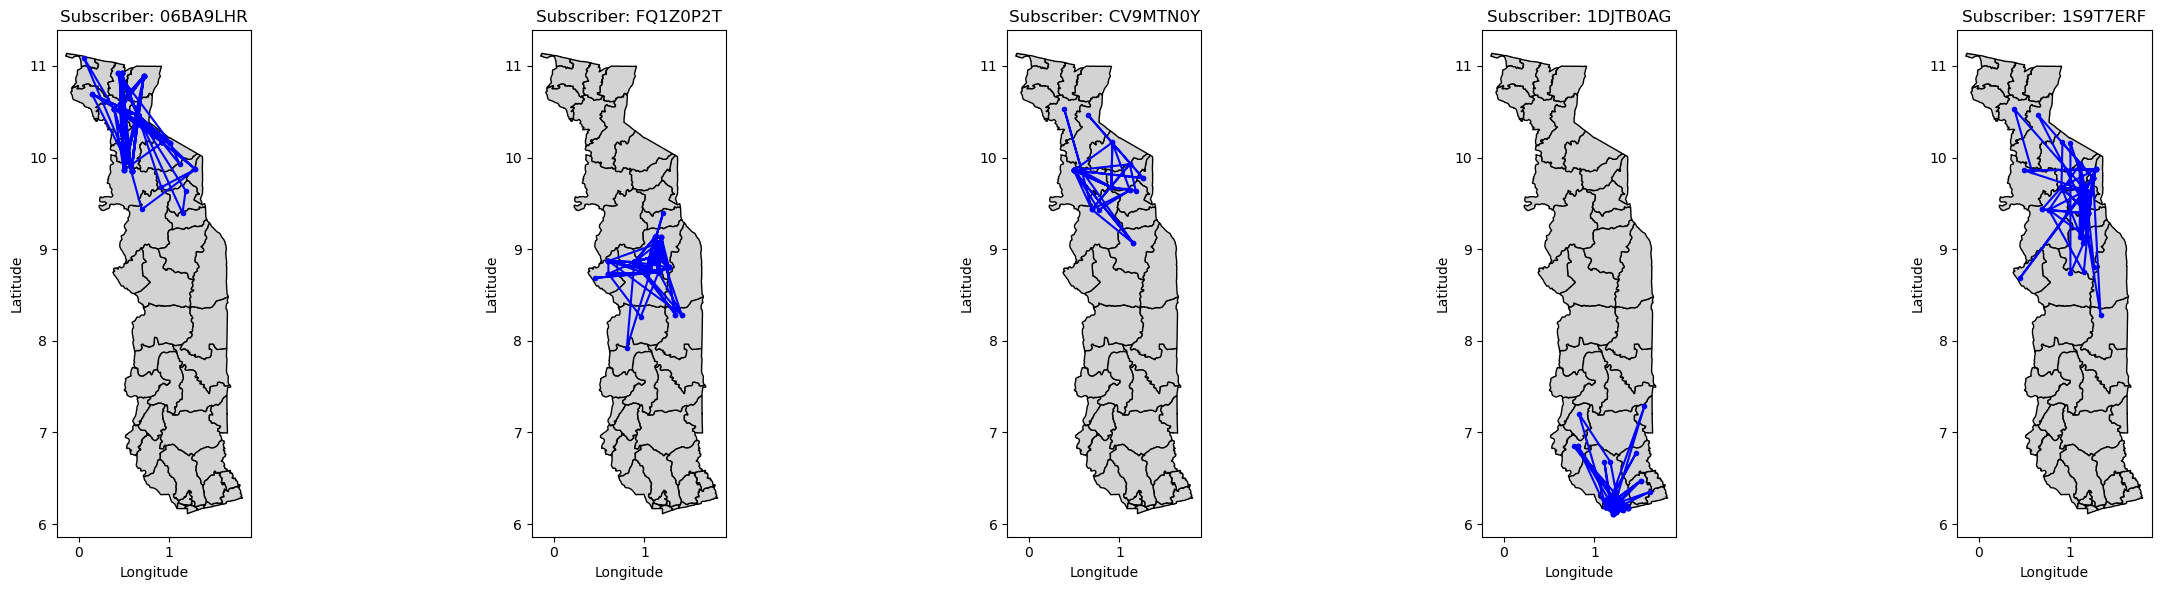

In [193]:
tower_data = pd.read_csv("towers.csv")
shapefile_data = gpd.read_file("prefectures.geojson")
transaction_data = pd.read_csv("cdr.csv")

# List of 5 selected subscribers
selected_callers = ['06BA9LHR', 'FQ1Z0P2T', 'CV9MTN0Y', '1DJTB0AG', '1S9T7ERF']

# Merge transaction data with tower locations
transaction_data = transaction_data.merge(tower_data, on="tower_id", how="left")

# Filter data for selected subscribers
selected_data = transaction_data[transaction_data['caller_id'].isin(selected_callers)]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for i, caller in enumerate(selected_callers):
    ax = axes[i]
    caller_data = selected_data[selected_data['caller_id'] == caller]
    shapefile_data.plot(ax=ax, color="lightgrey", edgecolor="black")

    ax.plot(caller_data["longitude"], caller_data["latitude"], 'b-', marker='o', markersize=3, label="Trajectory")

    # Title and labels
    ax.set_title(f"Subscriber: {caller}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

##### Question 4.2 Are you able to infer the location of every subscriber in the dataset every week? If not, how many subscribers are missing “homes” on average each week?

In [194]:
final_subscriber_weekly_prefecture_count = night_prefecture
unique_weeks_count = final_subscriber_weekly_prefecture_count["week"].nunique()

# Calculate the average number of missing homes each week
weekly_subscribers_coverage = (
    final_subscriber_weekly_prefecture_count
    .groupby(['week', 'caller_id'])
    .size()
    .reset_index(name="count")
)
# Count the number of callers with and without a home for each week
weekly_home_prefecture = weekly_subscribers_coverage.groupby('week').agg(
    callers_with_home=('caller_id', 'count')
).reset_index()
total_callers = final_subscriber_weekly_prefecture_count['caller_id'].nunique()
weekly_home_prefecture['callers_without_home'] = total_callers - weekly_home_prefecture['callers_with_home']

# Calculate the average number of missing homes each week
average_missing_homes = weekly_home_prefecture['callers_without_home'].mean()

print(f"There are {unique_weeks_count} weeks in the final dataset.")
print(f"On average, {average_missing_homes} subscribers are missing homes each week.")
display(weekly_home_prefecture)


There are 14 weeks in the final dataset.
On average, 11.142857142857142 subscribers are missing homes each week.


,week,callers_with_home,callers_without_home
0,1,127,18
1,2,133,12
2,3,136,9
3,4,137,8
4,5,139,6
5,6,134,11
6,7,133,12
7,8,134,11
8,9,136,9
9,10,136,9
